In [5]:
def metrics(true, pred, threshold=0.5):
    # Essa função calcula as principais métricas de algoritmos de classificação
    binary_pred = (pred > threshold).astype(int)
    acc = mt.accuracy_score(true, binary_pred)
    precision = mt.precision_score(true, binary_pred)
    recall = mt.recall_score(true, binary_pred)
    f1_score = mt.f1_score(true, binary_pred)
    resultado = [["Accuracy", round(acc,2)], ["Precision", round(precision,2)], ["Recall", round(recall,2)], ["F1_Score", round(f1_score,2)]]
    return resultado

Explicação sobre o threshhold na fórmula: 


O threshold é um valor que você escolhe para determinar a classificação binária a partir das probabilidades contínuas previstas pelo modelo. É o ponto de corte que decide se uma instância pertence à classe positiva ou negativa.



No contexto de classificação binária com um modelo de previsão de probabilidades, como no seu caso, o modelo retorna uma probabilidade contínua para cada instância. Para atribuir rótulos binários (0 ou 1), você precisa definir um limite (threshold).



Por padrão, muitas vezes o threshold é definido como 0.5. Isso significa que, se a probabilidade prevista for maior que 0.5, a instância é classificada como positiva (1), caso contrário, ela é classificada como negativa (0).

In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds #biblioteca que gera datasets para testes
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

import warnings


from sklearn import ensemble as en
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree as tr
from sklearn.linear_model import LogisticRegression

# Excluindo os avisos
warnings.filterwarnings("ignore")

In [7]:
## Separação entre Treino e Teste
#X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=0.2, random_state=random_state )

#===== TEST DATASEET =====
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

#===== VALIDATION DATASEET =====
X_val = pd.read_csv("X_validation.csv")
y_val = pd.read_csv("y_validation.csv")

#==== TRANING DATASEET =====
X_train  = pd.read_csv("X_training.csv")
y_train  = pd.read_csv("y_training.csv")

In [8]:
print(f"Number of rows {X_test.shape[0]}")
print(f"Number of columns {X_test.shape[1]}")

Number of rows 25893
Number of columns 25


In [9]:
print(f"Number of rows {X_val.shape[0]}")
print(f"Number of columns {X_val.shape[1]}")

Number of rows 31079
Number of columns 25


In [10]:
print(f"Number of rows {X_train.shape[0]}")
print(f"Number of columns {X_train.shape[1]}")

Number of rows 72515
Number of columns 25


In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train).ravel()

X_val   = np.array(X_val)
y_val   = np.array(y_val).ravel()
    
X_test  = np.array(X_test)
y_test  = np.array(y_test).ravel()

# K-Negihbors Classifer

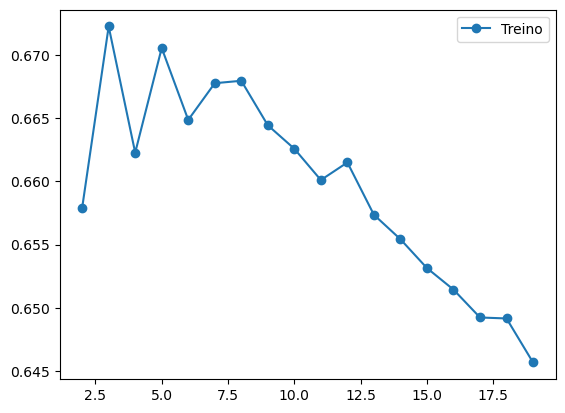

In [69]:
## Loop melhor parâmetro
values = [i for i in range( 2, 20 )]
val_scores = list()

for i in values:
    knn_classifier = KNeighborsClassifier( n_neighbors = i )
    knn_classifier.fit( X_train, y_train ) # quais são minhas características e quais são meus rótulos
    
    # classificação sobre a validação
    yhat_val = knn_classifier.predict( X_test )
    acc_val = mt.accuracy_score( y_test, yhat_val )
    val_scores.append( acc_val )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

Melhor parâmetro 3

In [37]:
# define
model = KNeighborsClassifier(n_neighbors = 3)

# fit
model.fit(X_train, y_train)

# performance
yhat_train = model.predict(X_train)

print(metrics(y_train, yhat_train))

# Validacao
# performance
yhat_val = model.predict(X_val)
print(metrics(y_val, yhat_val))

# Teste
yhat_test = model.predict(X_test)

print(metrics(y_test, yhat_test))

[['Accuracy', 0.83], ['Precision', 0.81], ['Recall', 0.8], ['F1_Score', 0.8]]
[['Accuracy', 0.68], ['Precision', 0.63], ['Recall', 0.62], ['F1_Score', 0.62]]
[['Accuracy', 0.67], ['Precision', 0.63], ['Recall', 0.61], ['F1_Score', 0.62]]


# Random Forest Classifier

In [40]:
## Loop melhor parâmetro
values = [i for i in range( 1, 100 )]
val_scores = list()

for i in values:
        model = en.RandomForestClassifier(n_estimators=i, max_depth=20, random_state=0)
        model.fit(X_train, y_train)

        y_scores = model.predict_proba(X_test)[:, 1]

        # Calculate ROC curve values
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)

        # Calculate AUC score
        auc_score = roc_auc_score(y_test, y_scores)
        val_scores.append( auc_score )

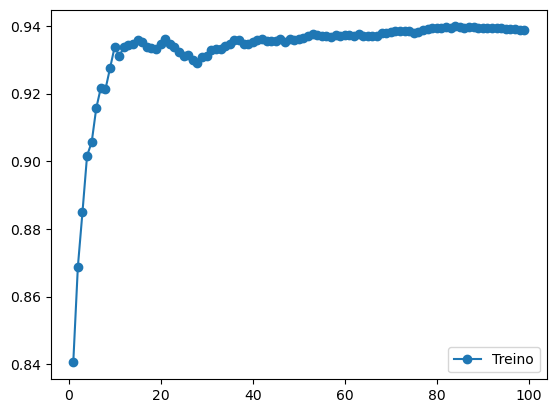

In [41]:
plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

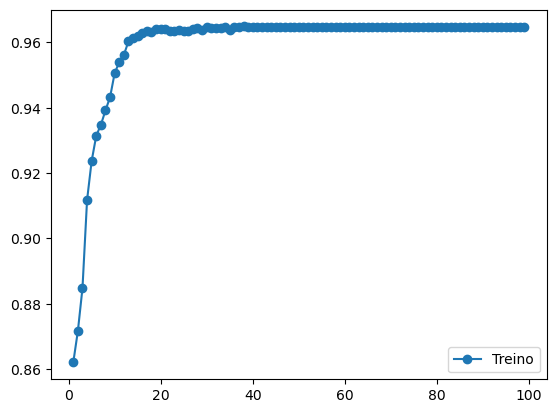

In [48]:
## Loop melhor parâmetro
values = [i for i in range( 1, 100 )]
val_scores = list()

for i in values:
        model = en.RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
        model.fit(X_train, y_train)

        y_scores = model.predict(X_test)

        # Calculate AUC score
        auc_score = mt.accuracy_score(y_test, y_scores)
        val_scores.append( auc_score )

plt.plot( values, val_scores, '-o', label='Treino' )
plt.legend()
plt.show()

[['Accuracy', 0.96], ['Precision', 0.97], ['Recall', 0.95], ['F1_Score', 0.96]]


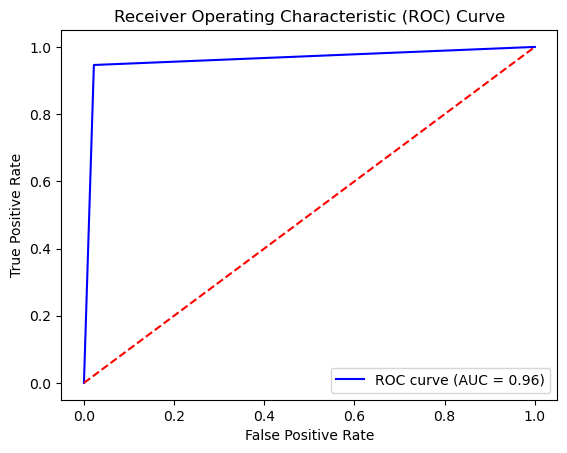

In [44]:
model = en.RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model.fit(X_train, y_train)

y_scores = model.predict(X_test)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_scores)
val_scores.append( auc_score )
                  
print(metrics(y_test, y_scores))
                  
# Plot ROC curve
plt.plot( fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend();

In [62]:
model = en.RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model.fit(X_train, y_train)

# TREINO
y_scores = model.predict(X_train)
print(metrics(y_train, y_scores))
print(roc_auc_score(y_train, y_scores))

# Validacao
y_scores = model.predict(X_val)

print(metrics(y_val, y_scores))
print(roc_auc_score(y_val, y_scores))


# performance
yhat_val = model.predict(X_val)

# Teste
y_scores = model.predict(X_test)

print(metrics(y_test, y_scores))
print(roc_auc_score(y_test, y_scores))


[['Accuracy', 1.0], ['Precision', 1.0], ['Recall', 0.99], ['F1_Score', 1.0]]
0.996347261374391
[['Accuracy', 0.96], ['Precision', 0.97], ['Recall', 0.94], ['F1_Score', 0.96]]
0.961615863107363
[['Accuracy', 0.96], ['Precision', 0.97], ['Recall', 0.95], ['F1_Score', 0.96]]
0.9621060098338861


# Decision Tree Classifier

In [54]:
# Instanciando e treinando a Decision Tree Regressor
model = tr.DecisionTreeRegressor(max_depth = 2,random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [55]:
# Realizando a predição com os dados de teste
y_scores = model.predict(X_test)

In [61]:
print(metrics(y_test, y_scores))

[['Accuracy', 0.85], ['Precision', 0.83], ['Recall', 0.84], ['F1_Score', 0.84]]


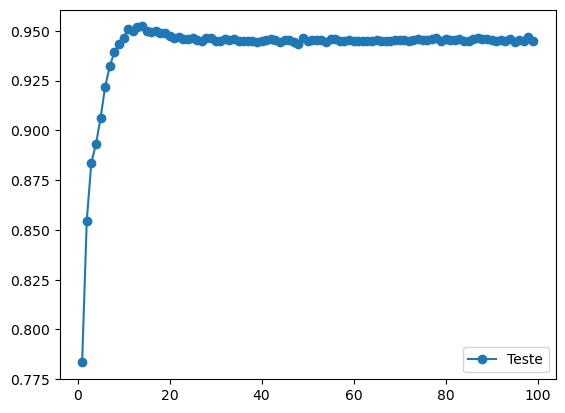

In [83]:
## Loop melhor parâmetro
values = [i for i in range( 1, 100 )]
val_scores = list()

for i in values:
        model = tr.DecisionTreeRegressor(max_depth = i)
        model.fit(X_train, y_train)

        y_scores = model.predict(X_test)
        
        # Calculate AUC score
        threshold = 0.5
        binary_pred = (y_scores > threshold).astype(int)
        auc_score = mt.accuracy_score(y_test, binary_pred)
        val_scores.append( auc_score )

plt.plot( values, val_scores, '-o', label='Teste' )
plt.legend()
plt.show()

In [85]:
model = tr.DecisionTreeRegressor(max_depth = 23)
model.fit(X_train, y_train)

# TREINO
y_scores = model.predict(X_train)
print(metrics(y_train, y_scores))

# Validacao
y_scores = model.predict(X_val)

print(metrics(y_val, y_scores))

# Teste
y_scores = model.predict(X_test)

print(metrics(y_test, y_scores))


[['Accuracy', 1.0], ['Precision', 1.0], ['Recall', 0.99], ['F1_Score', 1.0]]
[['Accuracy', 0.95], ['Precision', 0.94], ['Recall', 0.94], ['F1_Score', 0.94]]
[['Accuracy', 0.95], ['Precision', 0.94], ['Recall', 0.94], ['F1_Score', 0.94]]


# Logistic Regression 

In [15]:
# define
logistic = LogisticRegression(solver= 'lbfgs', C= 1)

# fit
logistic.fit(X_train, y_train)

# performance
y_scores = logistic.predict(X_test)

print(metrics(y_test, y_scores))

# define
logistic = LogisticRegression(solver= 'liblinear', C= 1)

# fit
logistic.fit(X_train, y_train)

# performance
y_scores = logistic.predict(X_test)

print(metrics(y_test, y_scores))

# define
logistic = LogisticRegression(solver= 'newton-cg', C= 1)

# fit
logistic.fit(X_train, y_train)

# performance
y_scores = logistic.predict(X_test)

print(metrics(y_test, y_scores))

# define
logistic = LogisticRegression(solver= 'newton-cholesky', C= 1)

# fit
logistic.fit(X_train, y_train)

# performance
y_scores = logistic.predict(X_test)

print(metrics(y_test, y_scores))



# define
logistic = LogisticRegression(solver= 'sag', C= 1)

# fit
logistic.fit(X_train, y_train)

# performance
y_scores = logistic.predict(X_test)

print(metrics(y_test, y_scores))


# define
logistic = LogisticRegression(solver= 'saga', C= 1)

# fit
logistic.fit(X_train, y_train)

# performance
y_scores = logistic.predict(X_test)

print(metrics(y_test, y_scores))

[['Accuracy', 0.56], ['Precision', 0.0], ['Recall', 0.0], ['F1_Score', 0.0]]
[['Accuracy', 0.79], ['Precision', 0.73], ['Recall', 0.84], ['F1_Score', 0.78]]
[['Accuracy', 0.87], ['Precision', 0.87], ['Recall', 0.83], ['F1_Score', 0.85]]
[['Accuracy', 0.87], ['Precision', 0.87], ['Recall', 0.83], ['F1_Score', 0.85]]
[['Accuracy', 0.56], ['Precision', 0.65], ['Recall', 0.0], ['F1_Score', 0.0]]
[['Accuracy', 0.56], ['Precision', 0.6], ['Recall', 0.0], ['F1_Score', 0.0]]


Melhores algoritmos newton-cholesky and newton-cg

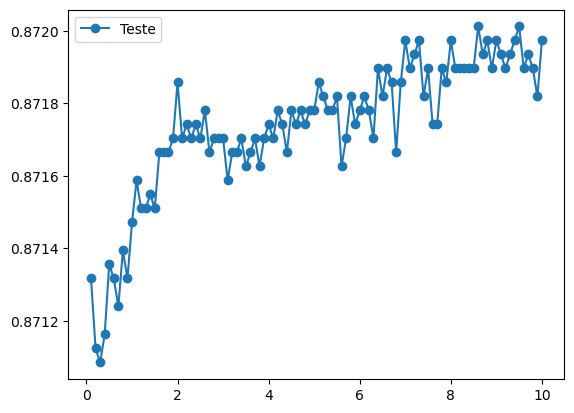

In [17]:
## Loop melhor parâmetro
values = np.linspace(0.1, 10, num=100)
val_scores = list()

for i in values:
        model =  LogisticRegression(solver= 'newton-cg', C= i)

        model.fit(X_train, y_train)

        y_scores = model.predict(X_test)
        
        # Calculate AUC score
        threshold = 0.5
        binary_pred = (y_scores > threshold).astype(int)
        auc_score = mt.accuracy_score(y_test, binary_pred)
        val_scores.append( auc_score )

plt.plot( values, val_scores, '-o', label='Teste' )
plt.legend()
plt.show()

In [21]:
model = LogisticRegression(solver= 'newton-cg', C= 1)
model.fit(X_train, y_train)

# TREINO
y_scores = model.predict(X_train)
print(metrics(y_train, y_scores))

# Validacao
y_scores = model.predict(X_val)

print(metrics(y_val, y_scores))


# performance
yhat_val = model.predict(X_val)

# Teste
y_scores = model.predict(X_test)

print(metrics(y_test, y_scores))

[['Accuracy', 0.88], ['Precision', 0.87], ['Recall', 0.84], ['F1_Score', 0.85]]
[['Accuracy', 0.87], ['Precision', 0.87], ['Recall', 0.84], ['F1_Score', 0.85]]
[['Accuracy', 0.87], ['Precision', 0.87], ['Recall', 0.83], ['F1_Score', 0.85]]
